# FINAL YEAR PROJECT

## 1 Introduction

## 1.1 Background

## 1.2 Data Description

## 1.3 Problem Statement

## Data Preprocessing

### 2.1 Importing the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from datetime import datetime

### Import the Datasets

In [2]:
%%time
df_InfoUser = pd.read_csv('data/Info_UserData.csv')
df_LogProblem = pd.read_csv('data/Log_Problem.csv')
df_InfoContent = pd.read_csv('data/Info_Content.csv')

Wall time: 1min 2s


In [ ]:
# set seed for reproducibility
np.random.seed(0) 

In [ ]:
df_InfoUser.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [ ]:
df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [ ]:
df_InfoContent.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


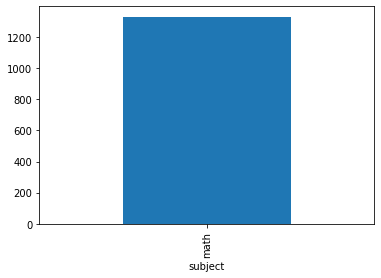

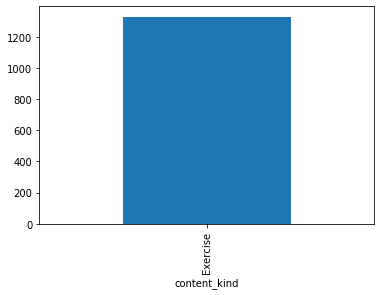

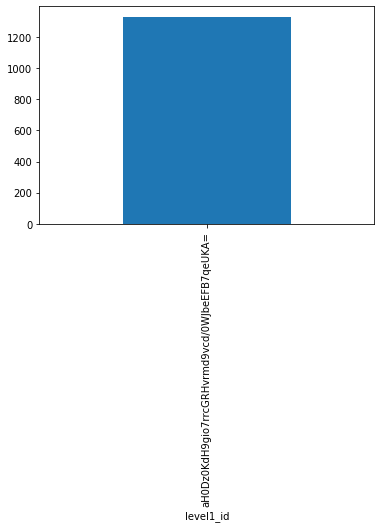

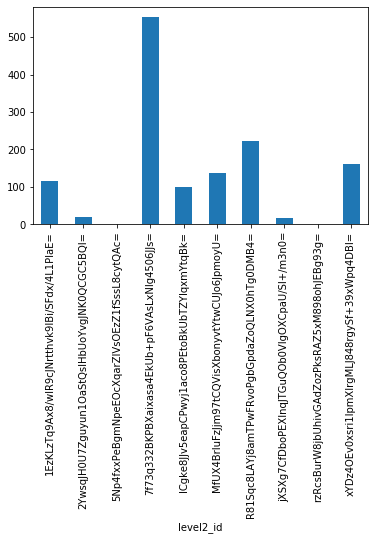

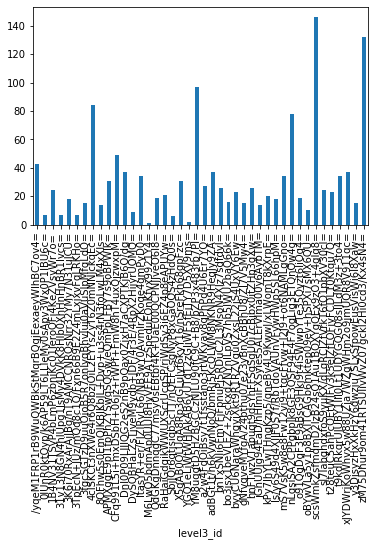

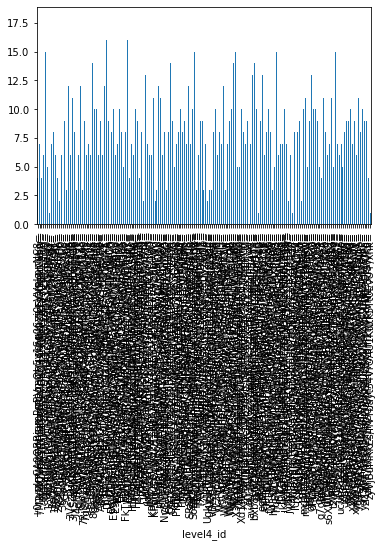

In [ ]:
df_InfoContent.groupby('subject')['ucid'].nunique().plot(kind='bar')
plt.show()
df_InfoContent.groupby('content_kind')['ucid'].nunique().plot(kind='bar')
plt.show()
df_InfoContent.groupby('level1_id')['ucid'].nunique().plot(kind='bar')
plt.show()
df_InfoContent.groupby('level2_id')['ucid'].nunique().plot(kind='bar')
plt.show()
df_InfoContent.groupby('level3_id')['ucid'].nunique().plot(kind='bar')
plt.show()
df_InfoContent.groupby('level4_id')['ucid'].nunique().plot(kind='bar')
plt.show()

Set the index to become the ‘month’ column:

## Handling Missing Values

### Info User

In [ ]:
df_InfoUser.head(5)

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [ ]:
# get the number of missing data points per column
missing_values_count = df_InfoUser.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_InfoUser.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.979521152313147


In [ ]:
# replace all NA's with unspecified
df_InfoUser.fillna('unspecified')

In [ ]:
df_LogProblem.head(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [ ]:
# get the number of missing data points per column
missing_values_count = df_LogProblem.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

uuid                                      0
ucid                                      0
upid                                      0
problem_number                            0
exercise_problem_repeat_session           0
is_correct                                0
total_sec_taken                           0
total_attempt_cnt                         0
used_hint_cnt                             0
is_hint_used                              0
is_downgrade                       14436018
is_upgrade                         14436018
level                                     0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_LogProblem.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

13.694784826867082


In [ ]:
# replace all NA's with false
df_InfoUser.fillna('false')

In [ ]:
df_InfoContent.head(5)

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [ ]:
# get the number of missing data points per column
missing_values_count = df_InfoContent.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_InfoContent.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


## Parsing Dates

In [ ]:
for index, row in df_LogProblem.iterrows():
    row['datetime'] = datetime.strptime(row['timestamp_TW'], '%Y-%m-%d %H:%M:%S %Z')

KeyboardInterrupt: 

In [ ]:
df_LogProblem.head()

In [ ]:
# print the first few rows of the date column
print(df_LogProblem['date_TW'].head())

### Handling Categorical Variables

Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or dtype) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables.

So far, we have only been working with numerical values. However, it is not
uncommon that real-world datasets contain one or more categorical feature columns.
In this section, we will make use of simple yet effective examples to see how we deal
with this type of data in numerical computing libraries.

#### Mapping ordinal features

To make sure that the learning algorithm interprets the ordinal features correctly,
we need to convert the categorical string values into integers. Unfortunately, there is
no convenient function that can automatically derive the correct order of the labels
of our size feature, so we have to define the mapping manually. In the following
simple example, let's assume that we know the numerical difference between
features, for example, hard = normal + 1 = easy + 2 = unset + 3.

In [ ]:
difficulty_mapping = {
    'easy': 1,
    'normal': 2,
    'hard': 3,
    'unset': 0
}
learning_stage_mapping = {
    'elementary': 1,
    'junior': 2,
    'senior': 3
}

In [ ]:
df_InfoContent['difficulty'] = df_InfoContent['difficulty'].map(difficulty_mapping)
df_InfoContent['learning_stage'] = df_InfoContent['learning_stage'].map(learning_stage_mapping)

In [ ]:
df_InfoContent.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


### Info User

In [ ]:
# Get list of categorical variables
s = (df_InfoUser.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['uuid', 'gender', 'first_login_date_TW', 'user_city']


In [ ]:
pd.get_dummies(df_InfoUser.gender, prefix='gender').iloc[:,:-1]

,gender_female,gender_male
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
72753,0,0
72754,0,0
72755,0,0
72756,1,0


In [ ]:
pd.get_dummies(df_InfoUser.user_city, prefix='user_city').iloc[:,:-1]

,user_city_chc,user_city_cy,user_city_hc,user_city_hlc,user_city_ilc,user_city_kh,user_city_kl,user_city_km,user_city_lj,user_city_ml,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
72754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
72756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Log Problem

In [ ]:
# Get list of categorical variables
s = (df_LogProblem.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['timestamp_TW', 'uuid', 'ucid', 'upid', 'is_downgrade', 'is_upgrade']


In [ ]:
pd.get_dummies(df_LogProblem.is_downgrade, prefix='is_downgrade').iloc[:,1:]

,is_downgrade_True
0,0
1,0
2,0
3,0
4,0
...,...
16217306,0
16217307,0
16217308,0
16217309,0


In [ ]:
### Splitting the 

In [ ]:
df_LogProblem.groupby('uuid')['total_sec_taken'].mean()

In [ ]:
plt.bar(df_LogProblem.uuid.unique(),df_LogProblem.groupby('uuid')['total_sec_taken'].mean())

In [ ]:
df_LogProblem.uuid.unique()

In [ ]:
merge_df_LogProblem = pd.merge(df_LogProblem, df_InfoUser, on = 'uuid')
merge_df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
1,2019-05-06 20:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,2rJ6DLjEMKZiRtzTx7yjg+2lbHOfTfLDyNli2mFXTiA=,DlnX9mEUtmu8i56DAfwfoFGY87J8+MyQO2TZzxPYwxw=,3,1,True,31,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
2,2019-06-01 20:45:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=,axF9BHrPqRAWLRi1190T0zxKUKB8oyoXujFhFiKWUmE=,16,1,True,7,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
3,2019-06-15 20:15:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,yjaPD3QSqIl7ZCg3iPipsr9kK8Bt/cKkDOVI5tyZMW0=,11,1,True,41,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
4,2019-06-16 12:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,Cfvrgm1Xt18sIEZ4kpSnePUQfJFC6uDZ281lZ6A7m+U=,kk8BQCpwxHT4caLIqSQj4WzUz8hE8Udaa02fV3sbKW8=,12,1,True,62,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1


## Splitting Test set

A Reminder: The first prediction is to predict whether a student will make it to level 4 (Which is the level that determines if a student is proficient at the exercise). If they don't make it to level 4, we want to know what level we think they will make it too

In [ ]:
mod_df_LogProblem

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
1,2019-05-06 20:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,2rJ6DLjEMKZiRtzTx7yjg+2lbHOfTfLDyNli2mFXTiA=,DlnX9mEUtmu8i56DAfwfoFGY87J8+MyQO2TZzxPYwxw=,3,1,True,31,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
2,2019-06-01 20:45:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=,axF9BHrPqRAWLRi1190T0zxKUKB8oyoXujFhFiKWUmE=,16,1,True,7,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
3,2019-06-15 20:15:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,yjaPD3QSqIl7ZCg3iPipsr9kK8Bt/cKkDOVI5tyZMW0=,11,1,True,41,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
4,2019-06-16 12:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,Cfvrgm1Xt18sIEZ4kpSnePUQfJFC6uDZ281lZ6A7m+U=,kk8BQCpwxHT4caLIqSQj4WzUz8hE8Udaa02fV3sbKW8=,12,1,True,62,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217306,2019-04-14 16:30:00 UTC,E8fJFFZyjQs5v269vJoeD0UnrbftUu8qhkjtQg1c0Zs=,TXBvUiNlr5jhR8zA+8xXAAvhjwKoxhJgVCFi6g3MkXE=,Abmm5Ye3eZw/VtKQEfUvwVxt7B7GEmrP9iiMZrXvWk0=,1,1,False,0,0,1,...,1357,0,2019-04-14,8,ty,0,False,0,0,0
16217307,2019-04-16 14:30:00 UTC,vw1aQ3xFH1p/8dileKreYvubN7nVrJQ4vsTquWAxvGM=,H9tE/axZ4DsmCfhZY9auIyxyBeXalwM2dnTvNSkhD+E=,OvRJFBLBV0NMDjJOvRLW1uMij0idXOhqlHS5KhKup7A=,2,1,True,60,1,0,...,1875,0,2019-04-16,9,ty,1,False,0,0,0
16217308,2019-05-06 21:30:00 UTC,g7XeGqv+sEyomgSQqK1MiD5qY7syNrgPpX5OYZBrC8g=,aaqqTl3AwAAh2Zu0fBTrKYA+Jgnh5Xcn3VznWez5WJU=,H+5LVP3dHsF1tuoMHH0uYM6TKMQQciQw5VI2LfwiZ38=,1,1,False,0,0,1,...,86,0,2019-05-06,11,tp,0,False,0,0,0
16217309,2019-04-08 09:00:00 UTC,4Pu17C+sQfnECIAa3jOPraAYg3BZ6Gtc+hPQx0/BPDw=,UJx6vGY4lwuup0V3VTTKZmE76AogRe5ecQHc+Yly1YM=,sw6x36H5i+khs6GWAkLEYBoRFk5YfSWhL2n2CLKVEU8=,1,1,True,80,1,0,...,75,0,2019-04-08,7,ylc,1,False,0,0,0


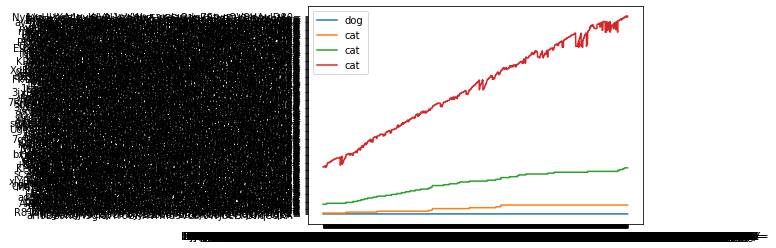

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_InfoContent['ucid'], df_InfoContent['level1_id'], label="dog")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level2_id'], label="cat")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level3_id'], label="cat")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level4_id'], label="cat")
ax.legend()

plt.show()
plt.savefig('a.png')

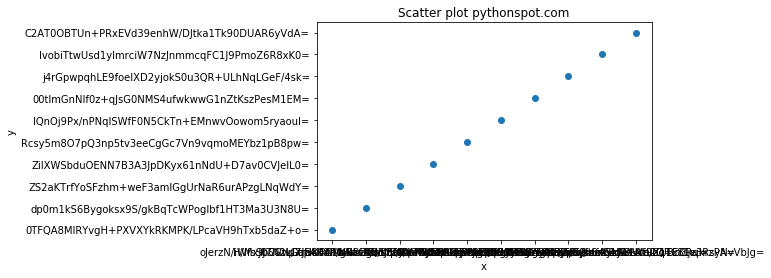

In [ ]:
plt.scatter(df_LogProblem.uuid[90:100], df_LogProblem.ucid[90:100])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
for x in df_LogProblem.uuid.unique():
    plt.plot(df_LogProblem.ucid[df_LogProblem.uuid==x])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000013DD49A43A8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_LogProblem.uuid.unique()

In [ ]:
df_LogProblem.ucid[df_LogProblem.uuid=="AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="]

19249       7TnOWfQ9G1fHRFFRHP2UNZ3SdWfN5I40rfh/K1ZepWc=
106078      iJ+Rpf5Qnw63bObvZLfXRBU4Hmi06Io+lXRGV9hsFgg=
142310      90InnhzKdtZM0H2+oxk5FJn/2H0Ms1RmMgi1UjxE9FI=
198809      cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=
282765      cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=
                                ...                     
16028399    o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=
16039926    Q0mRkMzFoFAkNaLsyPYFJoBmC4JdqV9riasp/YCRf/M=
16061414    o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=
16139628    flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=
16180614    flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=
Name: ucid, Length: 428, dtype: object

In [ ]:
df_LogProblem[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="]

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
19249,2019-06-21 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,7TnOWfQ9G1fHRFFRHP2UNZ3SdWfN5I40rfh/K1ZepWc=,zfX244pQp1PLL4WWGoYJJXZkvxo8MP06eycNWUtdFkQ=,2,1,False,45,5,2,True,NaN,NaN,0
106078,2018-09-27 14:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,iJ+Rpf5Qnw63bObvZLfXRBU4Hmi06Io+lXRGV9hsFgg=,yqXJXbWA2sTwsIm0dprAGSauF8q9o6qwe1Vu1JcVNtU=,5,1,False,11,2,1,True,NaN,NaN,0
142310,2018-09-27 15:15:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,90InnhzKdtZM0H2+oxk5FJn/2H0Ms1RmMgi1UjxE9FI=,e7h4n+ThBQGajZfbHu1EHBi49LtQBXdCXReSIL+I9oY=,2,1,True,33,1,0,False,NaN,NaN,0
198809,2018-09-20 15:15:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,dPpmDVG7i4Rx3/V4OPIcP7NfEwBtedFRP71/iaxDOu8=,8,1,True,63,1,0,False,NaN,NaN,0
282765,2018-08-09 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,zMNsTbk2NmOQiELRznFQbCYx0gCBCgfWSdd+Pyrmrkc=,1,1,True,22,1,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16028399,2019-05-02 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=,9hTTP4eKtLgCpYmwRq6PfSKD9ImD56OISUHTMLeH9HU=,13,1,False,11,1,1,True,NaN,NaN,0
16039926,2019-06-20 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,Q0mRkMzFoFAkNaLsyPYFJoBmC4JdqV9riasp/YCRf/M=,OpIAZ3xLeywyYdGXezdp9xf8mJDuYewlwGUMWEalhPI=,13,1,True,33,1,0,False,NaN,NaN,0
16061414,2019-05-02 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=,h4ek+3YBa/HDUJofpT4gA5cTvxWt2gpW5tHycp8RrxI=,12,1,False,20,4,1,True,NaN,NaN,0
16139628,2019-05-30 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=,UQO3YHdVKFEIzLYqb8BRpCy4YZiv8dIRXOA6u9qWuMs=,18,1,True,22,1,0,False,NaN,NaN,1


In [ ]:
plt.scatter(df_LogProblem.uuid[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="], df_LogProblem.upid[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()